In [3]:
import os
import numpy as np
import netCDF4 as netcdf
import matplotlib.pyplot as plt
import logging
from mpl_toolkits.basemap import Basemap
from matplotlib.font_manager import FontProperties
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
fa_dir = r"/home/ctroupin/Downloads/fontawesome-free-5.0.13/use-on-desktop/"
fp1 = FontProperties(fname=os.path.join(fa_dir, "Font Awesome 5 Free-Solid-900.otf"))

In [4]:
employers = {"NURC": (44.10202, 9.82024), 
             "ULPCG": (28.1118348, -15.4247743346376),
             "IMEDEA": (39.666525, 2.5808),
             "SOCIB": (39.57148, 2.646),
             "ULiege": (50.5830803, 5.559064),
             "NIB": (45.52972, 13.56694)}

In [5]:
lonlist = []
latlist = []
for e in employers.values():
    lonlist.append(e[1])
    latlist.append(e[0])
lonlist = np.array(lonlist)
latlist = np.array(latlist)

In [6]:
# Build domain
ratio = 0.05
lonmin, lonmax = lonlist.min(), lonlist.max()
latmin, latmax = latlist.min(), latlist.max()
dlon = lonmax - lonmin
dlat = latmax - latmin
coordinates = (lonmin - ratio * dlon, lonmax + ratio * dlon,
               latmin - ratio * dlat, latmax + ratio * dlat)
coordinates

(-16.874360051369479,
 15.016525716731881,
 26.988272524999999,
 51.706642574999996)

In [7]:
# Create basemaps
m = Basemap(projection='merc', llcrnrlon=coordinates[0], llcrnrlat=coordinates[2],
            urcrnrlon=coordinates[1], urcrnrlat=coordinates[3],
            lat_ts=0.5 * (coordinates[2] + coordinates[3]), resolution='i')

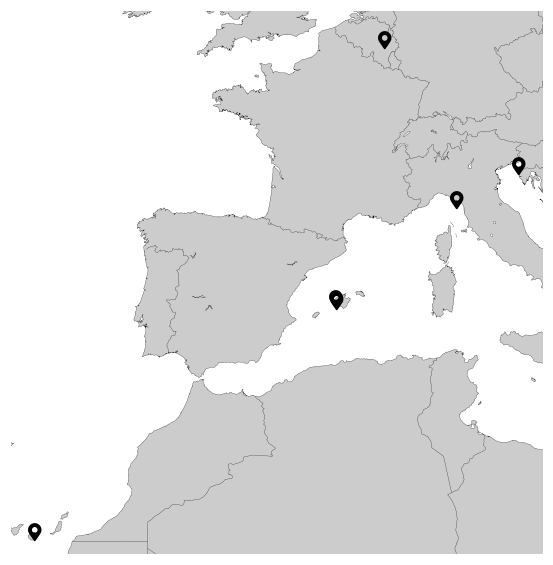

In [10]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
m.drawcountries(linewidth=.25)
m.drawcoastlines(linewidth=.25)
m.fillcontinents()
for e in employers.values():
    # m.plot(e[1], e[0], "o", color="k", ms=7, latlon=True)
    llon, llat = m(e[1], e[0])
    plt.text(llon, llat, "\uf3c5", fontproperties=fp1,
             fontsize=18, ha="center", va="center", zorder=7)
ax.axis('off')
    #        f1 = plt.gca()\n",
    #        f1.axes.get_xaxis().set_ticks([])\n",
    #        f1.axes.get_yaxis().set_ticks([])\n",
plt.savefig("employment_map2.png", transparent=True, dpi=300,
            bbox_inches='tight', pad_inches=0)
plt.show()
plt.close()